In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

### Reading and Understanding the data

In [3]:
market_data = pd.read_csv("SampleSuperstore.csv")
market_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
market_data.shape

(9994, 13)

In [5]:
market_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Seems like there would be some outliers in the data.

#### Lets check for null values.

In [6]:
market_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There are No null values in the data.

In [7]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Data types of all columns are in correct and no need to change.

### Univariant Analysis

In [8]:
market_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
market_data.rename(columns = {"Ship Mode" : "Ship_Mode", "Postal Code" : "Postal_Code", "Sub-Category" : "Sub_Category"}, inplace = True)

In [10]:
market_data.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


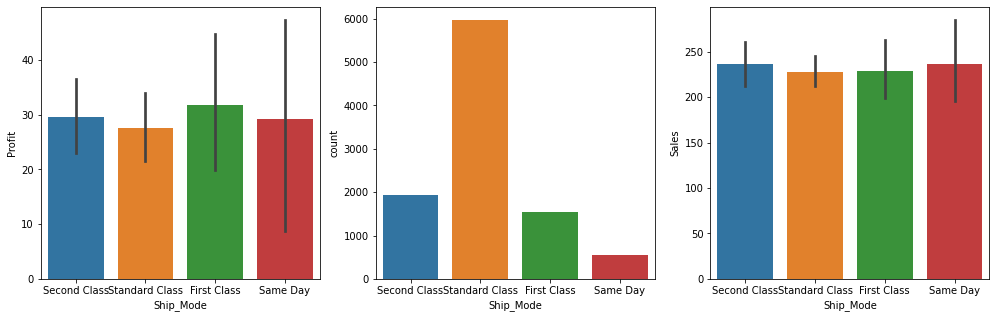

In [11]:
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)           
sns.barplot(x = market_data.Ship_Mode, y = market_data.Profit)
plt.subplot(1,3,2)
sns.countplot(x = market_data.Ship_Mode)
plt.subplot(1,3,3)
sns.barplot(x = market_data.Ship_Mode, y = market_data.Sales)
plt.show()

#### Profit : The cutomers who belong to "First Class" are giving high profits compared to remaining classes
#### Number of orders : The class "Standard class" have high number of orders compared to remaining classes.
#### Sales : All the Classes have comparatively Significant level of sales in all states.

#### Similarly lets check other features.

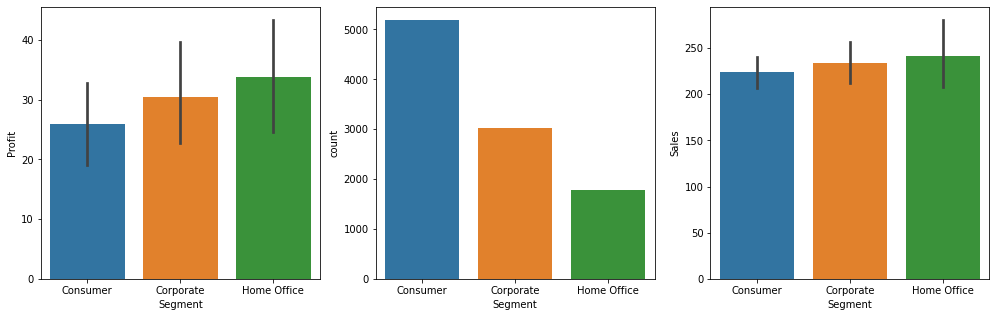

In [12]:
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)           
sns.barplot(x = market_data.Segment, y = market_data.Profit)
plt.subplot(1,3,2)
sns.countplot(x = market_data.Segment)
plt.subplot(1,3,3)
sns.barplot(x = market_data.Segment, y = market_data.Sales)
plt.show()

#### Profit : "Home Appliances" gives high rate of profit where "Consumer" gives low rate.
#### Sales : All the segments have signicant rate of sales.
#### Order Rate : "Consumers" have high rate of orders in all states compared to remaining segments.

#### Lets check for Sub-categories. In order to determine the actual price of the product we need to calculate using quantity.

In [13]:
market_data["Price"] = market_data.Sales/market_data.Quantity

#### Similarly for profit also.

In [14]:
market_data["Profit_of_product"] = market_data.Profit/market_data.Quantity

In [15]:
market_data.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Price,Profit_of_product
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,20.9568
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,73.1940
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,3.4357
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-76.6062
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,1.2582


#### Price of Products

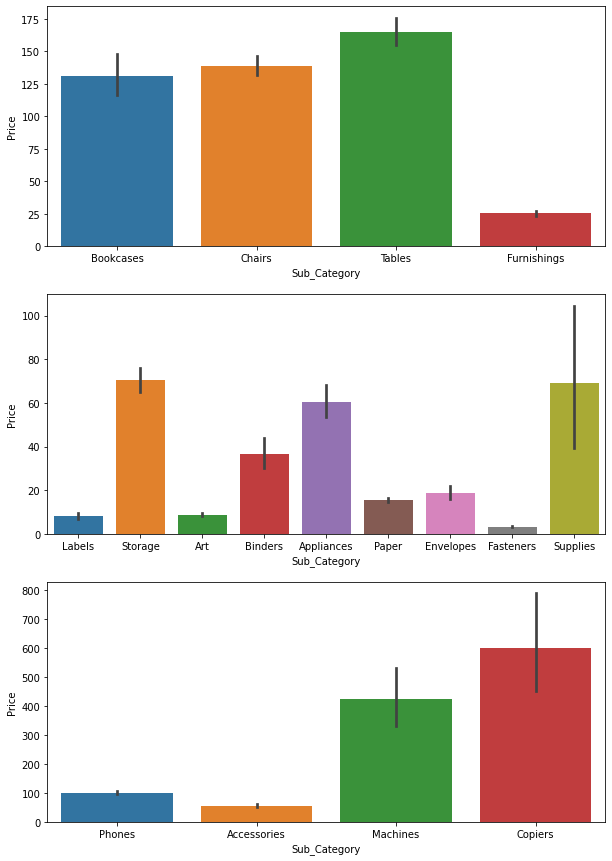

In [16]:
furniture_data = market_data[market_data["Category"] == "Furniture"]
office_data = market_data[market_data["Category"] == "Office Supplies"]
Technology_data = market_data[market_data["Category"] == "Technology"]
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.barplot(x = furniture_data.Sub_Category, y = furniture_data.Price)
plt.subplot(3,1,2)
sns.barplot(x = office_data.Sub_Category, y = office_data.Price)
plt.subplot(3,1,3)
sns.barplot(x = Technology_data.Sub_Category, y = Technology_data.Price)
plt.show()

#### Furniture :  For "Furniture" Category "Tables" are mostly high mark with around 150 to 175 dollors price. Chairs are also significantly high.
#### Office Appliances : For Office appilances all the products falls under 100 dollor mark. among thhem "Supplies" and "Storage" show little High price.
#### Technology : "Machines" and "Copiers" have high price. 


#### Profit vs Loss

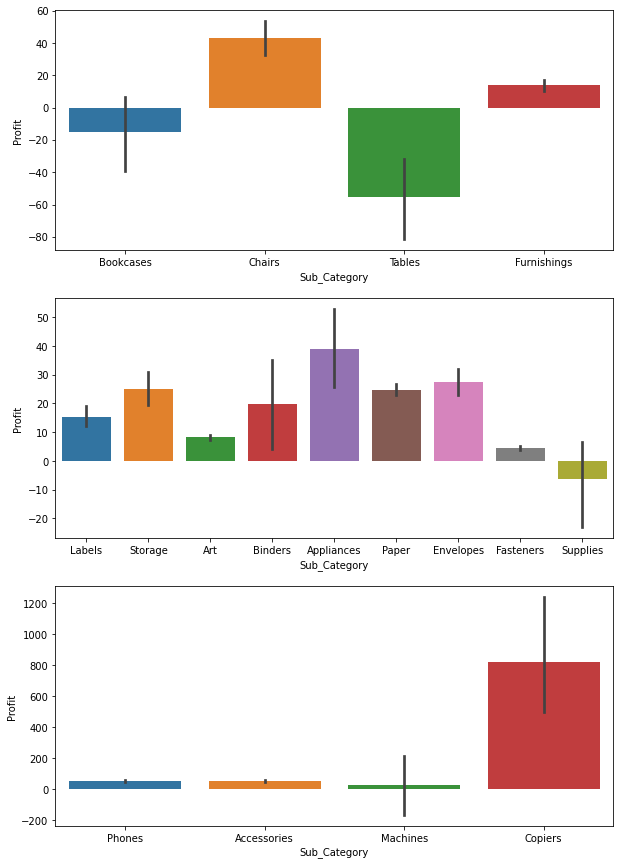

In [17]:
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.barplot(x = furniture_data.Sub_Category, y = furniture_data.Profit)
plt.subplot(3,1,2)
sns.barplot(x = office_data.Sub_Category, y = office_data.Profit)
plt.subplot(3,1,3)
sns.barplot(x = Technology_data.Sub_Category, y = Technology_data.Profit)
plt.show()

#### Furniture : As we can see that the "tables" category has significantly high in loss where the store is loosing. Bookcases is the next category where the store is losing the money (loss). In all categories "Chairs" are likely to be produce high profits.
#### Office Appliances : Supplies produce Significant amount of loss. And fastners produce low profit.
#### Technology : The category of products which are unde Machines are likely to be in loss for the stores.

#### In order to determine the values of loss in detail lets create a colun n the dataset with Loss.

In [18]:
market_data['Loss'] = market_data.Profit.apply(lambda x:x if x < 0 else 0)
market_data.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Price,Profit_of_product,Loss
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,20.9568,0.000
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,73.1940,0.000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,3.4357,0.000
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-76.6062,-383.031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,1.2582,0.000


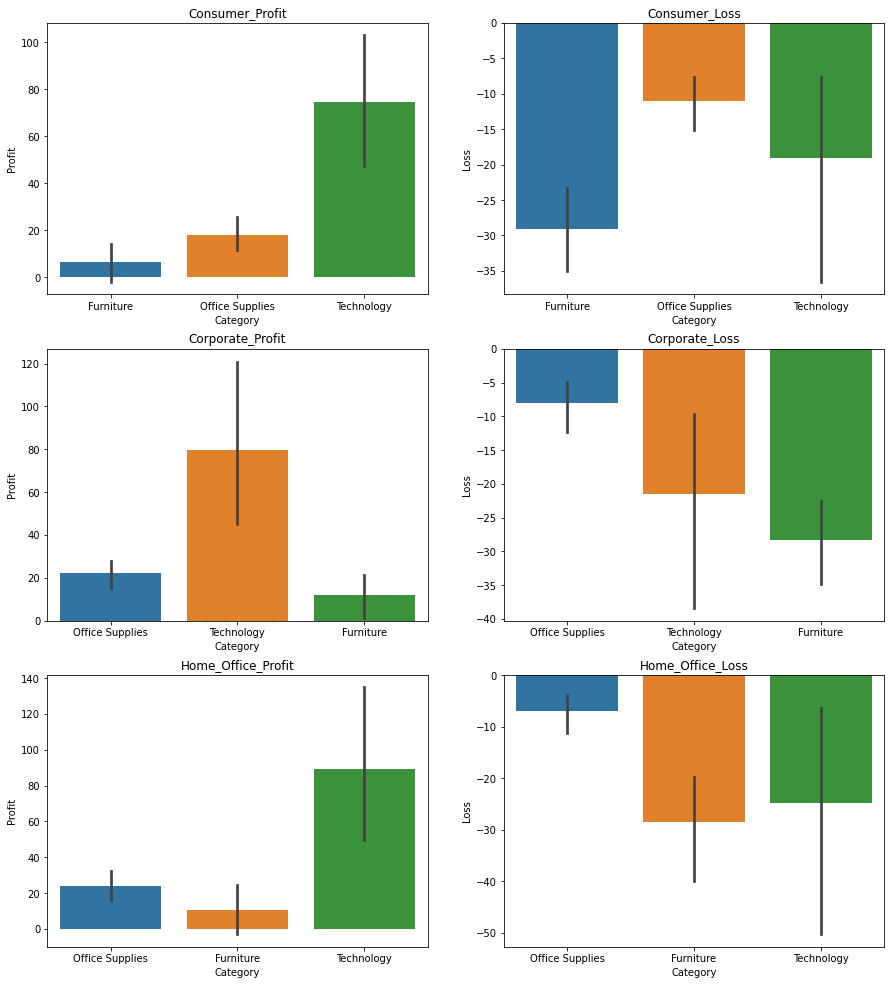

In [19]:
consumer_data = market_data[market_data["Segment"] == "Consumer"]
coporate_data = market_data[market_data["Segment"] == "Corporate"]
home_data = market_data[market_data["Segment"] == "Home Office"]
plt.figure(figsize = (15,17))
plt.subplot(3,2,1)
sns.barplot(x = consumer_data.Category, y = consumer_data.Profit).set_title("Consumer_Profit")
plt.subplot(3,2,3)
sns.barplot(x = coporate_data.Category, y = coporate_data.Profit).set_title("Corporate_Profit")
plt.subplot(3,2,5)
sns.barplot(x = home_data.Category, y = home_data.Profit).set_title("Home_Office_Profit")
plt.subplot(3,2,2)
sns.barplot(x = consumer_data.Category, y = consumer_data.Loss).set_title("Consumer_Loss")
plt.subplot(3,2,4)
sns.barplot(x = coporate_data.Category, y = coporate_data.Loss).set_title("Corporate_Loss")
plt.subplot(3,2,6)
sns.barplot(x = home_data.Category, y = home_data.Loss).set_title("Home_Office_Loss")
plt.show()

#### All the segments have high profits in "Technology" and High Loss in "Furniture".
#### Lets check which items are most bought.

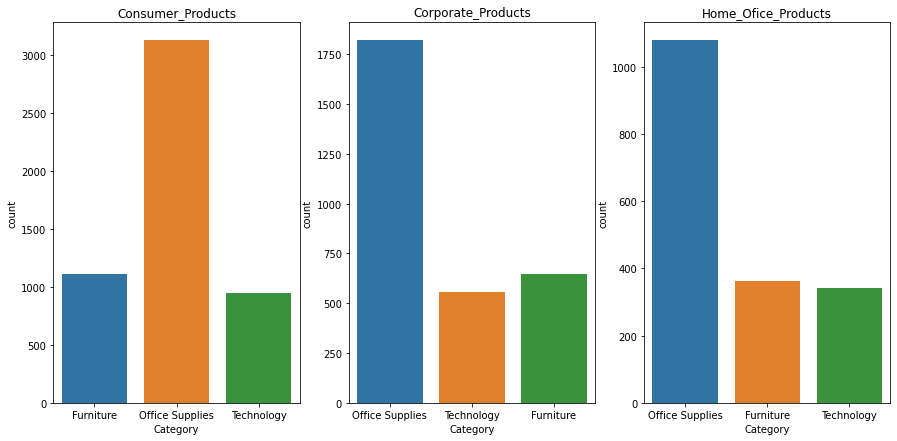

In [20]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
sns.countplot(x = consumer_data.Category).set_title("Consumer_Products")
plt.subplot(1,3,2)
sns.countplot(x = coporate_data.Category).set_title("Corporate_Products")
plt.subplot(1,3,3)
sns.countplot(x = home_data.Category).set_title("Home_Ofice_Products")
plt.show()

#### In all the three segments "Office Appliances" are most buyed products and "Technology" are least buyed product.

#### Lets deal with discount.

In [21]:
market_data["Discount_Status"] = market_data.Discount.apply(lambda x:"No" if x == 0 else "Yes")

#### Discount vs (Sales, Profit, Price)

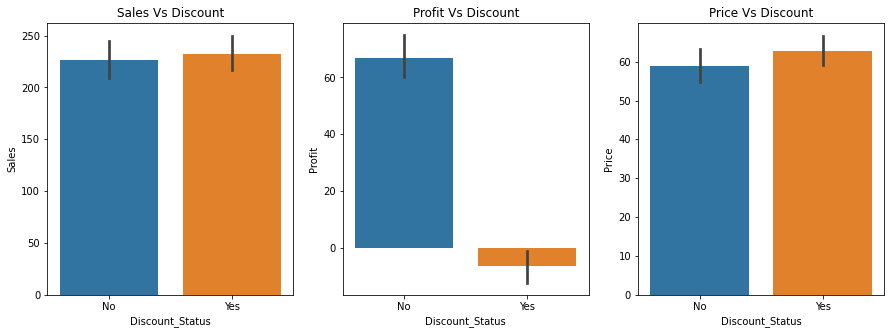

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.barplot(x = market_data.Discount_Status, y = market_data.Sales).set_title("Sales Vs Discount")
plt.subplot(1,3,2)
sns.barplot(x = market_data.Discount_Status, y = market_data.Profit).set_title("Profit Vs Discount")
plt.subplot(1,3,3)
sns.barplot(x = market_data.Discount_Status, y = market_data.Price).set_title("Price Vs Discount")
plt.show()

#### From the above plot we can say the people tend to buy products which are in discounts. As we can see in Price and sales plot as there is discount there is more sales.

#### Lets find out which Region have high and low sales.

In [23]:
market_data.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

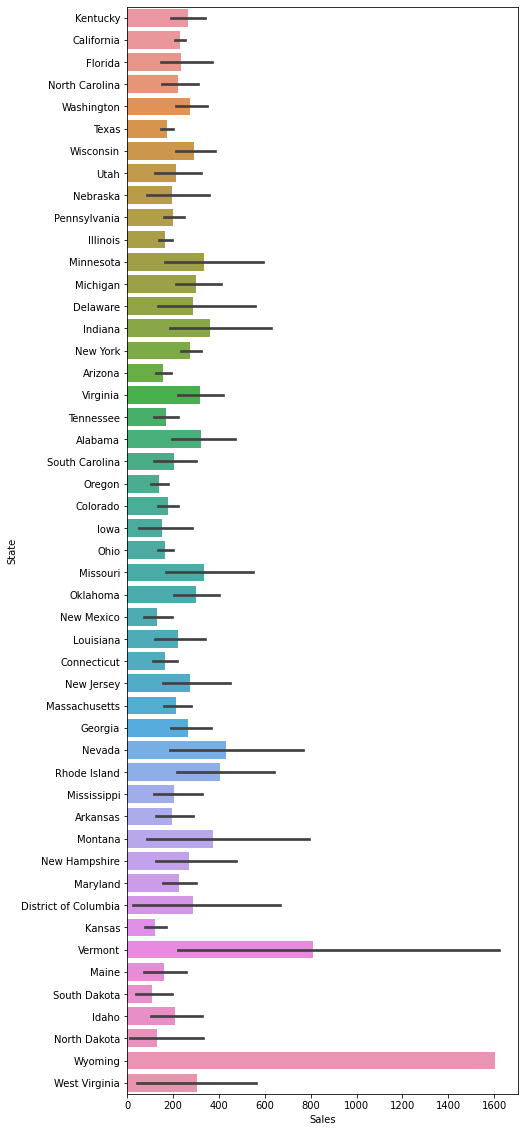

In [24]:
plt.figure(figsize = (7,20))
sns.barplot(x = market_data.Sales, y = market_data.State)
plt.show()


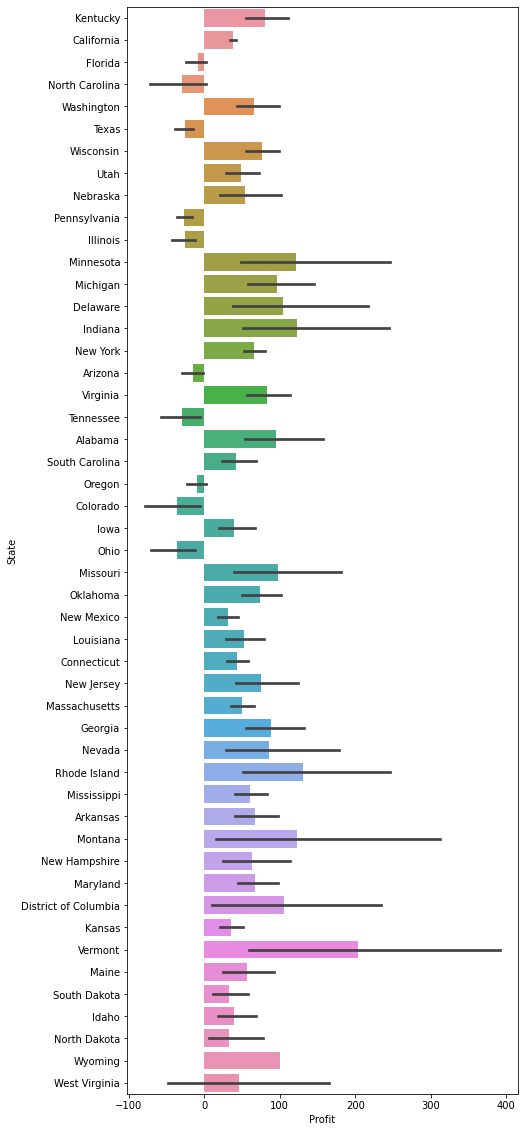

In [25]:
plt.figure(figsize = (7,20))
sns.barplot(x = market_data.Profit, y = market_data.State)
plt.show()

In [26]:
market_data['Profit_sales_ratio'] = (market_data["Profit"] / market_data["Sales"]).round(2)
market_data.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Price,Profit_of_product,Loss,Discount_Status,Profit_sales_ratio
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,20.9568,0.000,No,0.16
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,73.1940,0.000,No,0.30
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,3.4357,0.000,No,0.47
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-76.6062,-383.031,Yes,-0.40
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,1.2582,0.000,Yes,0.11


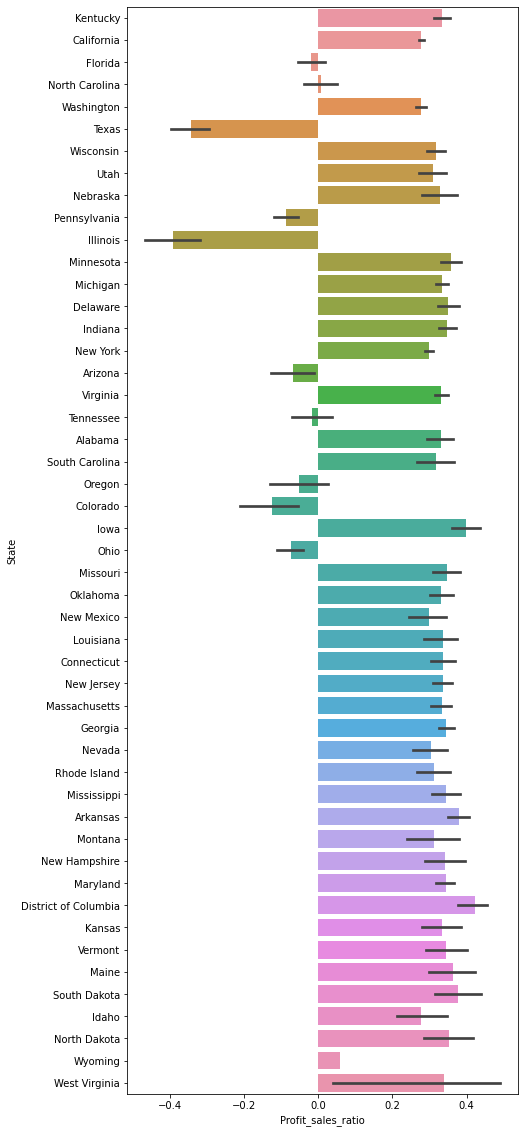

In [27]:
plt.figure(figsize = (7,20))
sns.barplot(x = "Profit_sales_ratio", y = "State", data = market_data)
plt.show()

#### Lets focus on countries with "Loss".
#### As you can see from plot the countries "Texas", "Pennsylvania", "Illinios", "Arizona", "Colorado" are the countries to be considered with more percentage of loss. Lets check which products are sold mostly in these countries and which products are not sold.

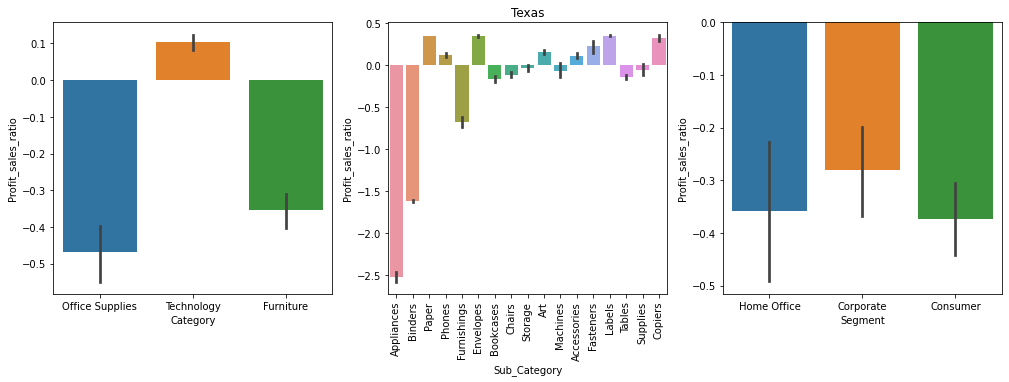

In [49]:
Texas_data = market_data[market_data["State"] == "Texas"]
plt.figure(figsize = (17,5))
plt.subplot(1,3,1)
sns.barplot(x = Texas_data.Category, y = Texas_data.Profit_sales_ratio)
plt.subplot(1,3,2)
sns.barplot(x = Texas_data.Sub_Category, y = Texas_data.Profit_sales_ratio).set_title("Texas")
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.barplot(x = Texas_data.Segment, y = Texas_data.Profit_sales_ratio)
plt.show()


#### Similarly for other countries as well.

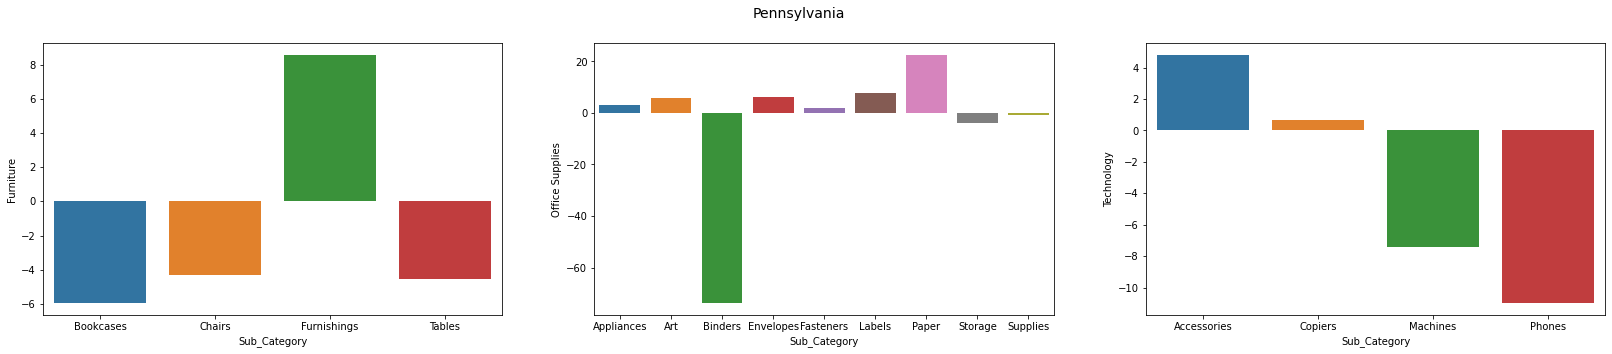

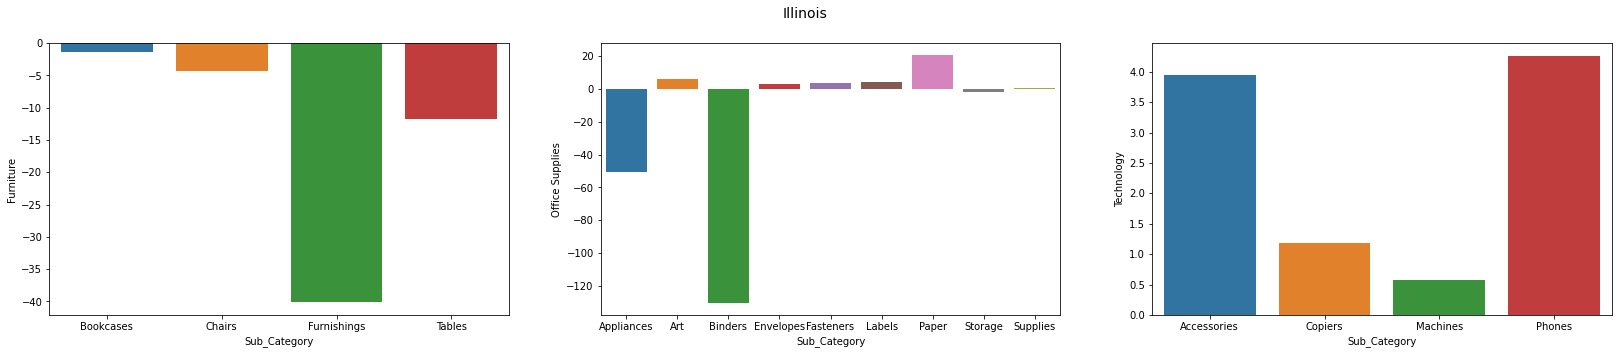

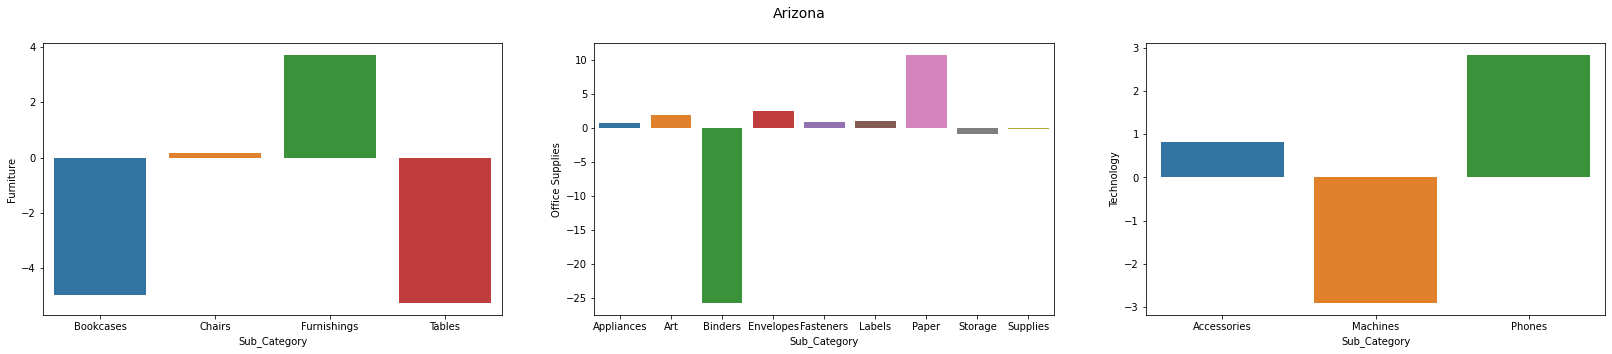

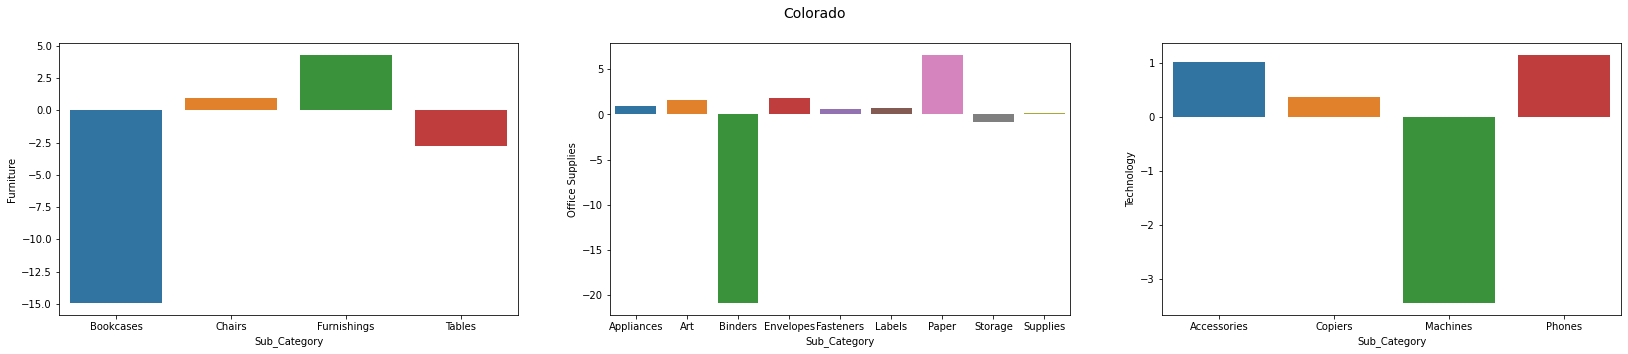

In [48]:
states = ["Pennsylvania", "Illinois", "Arizona", "Colorado"]
products = market_data.groupby(['State'])
for i in states:
    data = products.get_group(i).groupby(['Category'])
    fig, ax = plt.subplots(1, 3, figsize = (28,5))
    fig.suptitle(i, fontsize=14)        
    ax_index = 0
    for j in ['Furniture', 'Office Supplies', 'Technology']:
        category = data.get_group(j).groupby(['Sub_Category']).sum()
        sns.barplot(x = category.index, y = category.Profit_sales_ratio, ax = ax[ax_index])
        ax[ax_index].set_ylabel(j)
        ax_index +=1
    fig.show()
    

#### From the above plots we can see the following insights:
#### In Sub-category of Office Appliances the "Binders" have high rate of Loss in all the cities and "Papers" Gives high rate of profit to the company. Now coming to the Sub-category of Technology, "Pennsylvania, " gives high profit in "Accesories" and high loss in "Phones". "Illinois" gives No lose in any of the products of technology. "Arizona and " gives high profit in "Phones" and loss in "Macines". Finally, "Colorado" gives significant profit in "Phones" and High loss in "Machines" gives Loss in all categories significantly.